In [1]:
library(httr)
library(rvest)
library(dplyr)
library(RSelenium)

# CMD cd C:\selenium java -Dwebdriver.gecko.driver="geckodriver.exe" -jar selenium-server-standalone-3.141.59.jar -port 4445

remD <- remoteDriver(port=4445L, browserName="chrome")
remD$open()


title_forme <- "shampoo" 
remD$navigate(paste0("https://list.tmall.hk/search_product.htm?q=",title_forme))


Loading required package: xml2

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


[1] "Connecting to remote server"
$acceptInsecureCerts
[1] FALSE

$browserName
[1] "chrome"

$browserVersion
[1] "79.0.3945.117"

$chrome
$chrome$chromedriverVersion
[1] "79.0.3945.16 (93fcc21110c10dbbd49bbff8f472335360e31d05-refs/branch-heads/3945@{#262})"

$chrome$userDataDir
[1] "C:\\Users\\seung\\AppData\\Local\\Temp\\scoped_dir19096_517797172"


$`goog:chromeOptions`
$`goog:chromeOptions`$debuggerAddress
[1] "localhost:51264"


$networkConnectionEnabled
[1] FALSE

$pageLoadStrategy
[1] "normal"

$platformName
[1] "windows"

$proxy
named list()

$setWindowRect
[1] TRUE

$strictFileInteractability
[1] FALSE

$timeouts
$timeouts$implicit
[1] 0

$timeouts$pageLoad
[1] 300000

$timeouts$script
[1] 30000


$unhandledPromptBehavior
[1] "dismiss and notify"

$webdriver.remote.sessionid
[1] "0cac27d3fc9832fb96a4f346cd8637df"

$id
[1] "0cac27d3fc9832fb96a4f346cd8637df"



In [2]:

html <- remD$getPageSource()[[1]]
html <- read_html(html)

product_title <- html %>% html_nodes(".productTitle") %>% html_text()
product_title[1:10]

[1] "\n\n\n施泰福Physiogel<U+970F><U+4E1D>佳<U+6D01><U+51C0>敏感肌<U+80A4><U+6E29>和无<U+7682>洗<U+53D1>水Shampoo 250ml\n\n\n"
 [2] "\n\n\n<U+97E9><U+56FD>直<U+90AE>TS SHAMPOO洗<U+53D1>水 滋<U+517B><U+5934>皮去屑止痒控油防止<U+8131><U+53D1>300ml\n\n\n"
 [3] "\n\n\n<U+97E9><U+56FD>直<U+90AE>TS SHAMPOO洗<U+53D1>水 滋<U+517B><U+5934>皮去屑止痒控油防止<U+8131><U+53D1>300ml\n\n\n"
 [4] "\n\n\n<U+97E9><U+56FD>直<U+90AE> <U+97E9><U+56FD>TS SHAMPOO BD洗<U+53D1>水500ml去屑止痒<U+6E05>爽控油洗<U+53D1>露\n\n\n"
 [5] "\n\n\nRoyal Spa? Chamomile Shampoo洋甘菊洗<U+53D1>水保<U+6E7F>滋<U+6DA6>shop.com\n\n\n"
 [6] "\n\n\n<U+97E9><U+56FD>直<U+90AE> <U+97E9><U+56FD>TS SHAMPOO BD洗<U+53D1>水500ml去屑止痒<U+6E05>爽控油洗<U+53D1>露\n\n\n"
 [7] "\n\n\n【<U+97E9><U+56FD><U+4ED3>直<U+90AE>】<U+97E9><U+56FD>TS SHAMPOO<U+5A74><U+513F>洗<U+53D1>水 <U+6E29>和天然洗<U+62A4>二合一\n\n\n"
 [8] "\n\n\n【<U+97E9><U+56FD><U+4ED3>直<U+90AE>】<U+97E9><U+56FD>TS SHAMPOO<U+5A74><U+513F>洗<U+53D1>水 <U+6E29>和天然洗<U+62A4>二合一\n\n\n"
 [9] "\n\n\n<U+97E9><U+56FD>直<U+90AE>[Pyunkang Yul] Ato Wash   Shampoo 290ml\n\n\n"
[10] "\n\n\n<U+97E9><U+56FD>直<U+90AE>[Pyunkang Yul] Ato Wash & Shampoo 290ml\n\n\n"

In [3]:

product_title <- gsub("\n", " ", product_title)
product_title <- gsub("ml", " ", product_title)
product_title <- trimws(product_title)
# 공백을 제거해주는 trimws() 함수
# 참고 : https://blog.naver.com/itisik/221642089380

In [4]:
product_title[1:10]

[1] "施泰福Physiogel<U+970F><U+4E1D>佳<U+6D01><U+51C0>敏感肌<U+80A4><U+6E29>和无<U+7682>洗<U+53D1>水Shampoo 250"
 [2] "<U+97E9><U+56FD>直<U+90AE>TS SHAMPOO洗<U+53D1>水 滋<U+517B><U+5934>皮去屑止痒控油防止<U+8131><U+53D1>300"
 [3] "<U+97E9><U+56FD>直<U+90AE>TS SHAMPOO洗<U+53D1>水 滋<U+517B><U+5934>皮去屑止痒控油防止<U+8131><U+53D1>300"
 [4] "<U+97E9><U+56FD>直<U+90AE> <U+97E9><U+56FD>TS SHAMPOO BD洗<U+53D1>水500 去屑止痒<U+6E05>爽控油洗<U+53D1>露"
 [5] "Royal Spa? Chamomile Shampoo洋甘菊洗<U+53D1>水保<U+6E7F>滋<U+6DA6>shop.com"
 [6] "<U+97E9><U+56FD>直<U+90AE> <U+97E9><U+56FD>TS SHAMPOO BD洗<U+53D1>水500 去屑止痒<U+6E05>爽控油洗<U+53D1>露"
 [7] "【<U+97E9><U+56FD><U+4ED3>直<U+90AE>】<U+97E9><U+56FD>TS SHAMPOO<U+5A74><U+513F>洗<U+53D1>水 <U+6E29>和天然洗<U+62A4>二合一"
 [8] "【<U+97E9><U+56FD><U+4ED3>直<U+90AE>】<U+97E9><U+56FD>TS SHAMPOO<U+5A74><U+513F>洗<U+53D1>水 <U+6E29>和天然洗<U+62A4>二合一"
 [9] "<U+97E9><U+56FD>直<U+90AE>[Pyunkang Yul] Ato Wash   Shampoo 290"
[10] "<U+97E9><U+56FD>直<U+90AE>[Pyunkang Yul] Ato Wash & Shampoo 290"

In [5]:

# 형태소 분석 후  워드 클라우드 만들기 
library(jiebaR)
library(wordcloud)

seg <- qseg[product_title]
seg <- seg[nchar(seg)>1]
seg <- table(seg)
length(seg)

Loading required package: jiebaRD
Loading required package: RColorBrewer
Warning message in `[.qseg`(qseg, product_title):
"Quick mode is depreciated, and is scheduled to be remove in v0.11.0. If you want to keep this feature, please submit a issue on GitHub page to let me know."

[1] 232

In [6]:

seg <- sort(seg, decreasing = TRUE)
seg

seg
 洗<U+53D1>水            TS <U+97E9><U+56FD>          硅油  洗<U+53D1>露 
           44            26            22            16            16 
         去屑    修<U+62A4>  帝<U+53F6>斯          控油           250 
           14            14            13            12            11 
          500    <U+5934>皮          止痒    <U+6E29>和    <U+8FDB>口 
           11             9             9             8             8 
   防<U+8131>    滋<U+517B>           300          Hair    保<U+6E7F> 
            8             8             7             7             7 
   直<U+90AE>    Christophe      Holistic         Robin       SHAMPOO 
            7             6             6             6             6 
   洗<U+62A4>    柔<U+987A>    滋<U+6DA6>  精<U+534E>素    <U+6E05>爽 
            6             6             6             6             5 
          ALL           NEW       Shampoo          改善    修<U+590D> 
            5             5             5             5             5 
<U+8131><U+53D1>    <U+987A>滑 

ERROR: Error in wordcloud2(seg, color = "random-light", backgroundColor = "grey"): 함수 "wordcloud2"를 찾을 수 없습니다


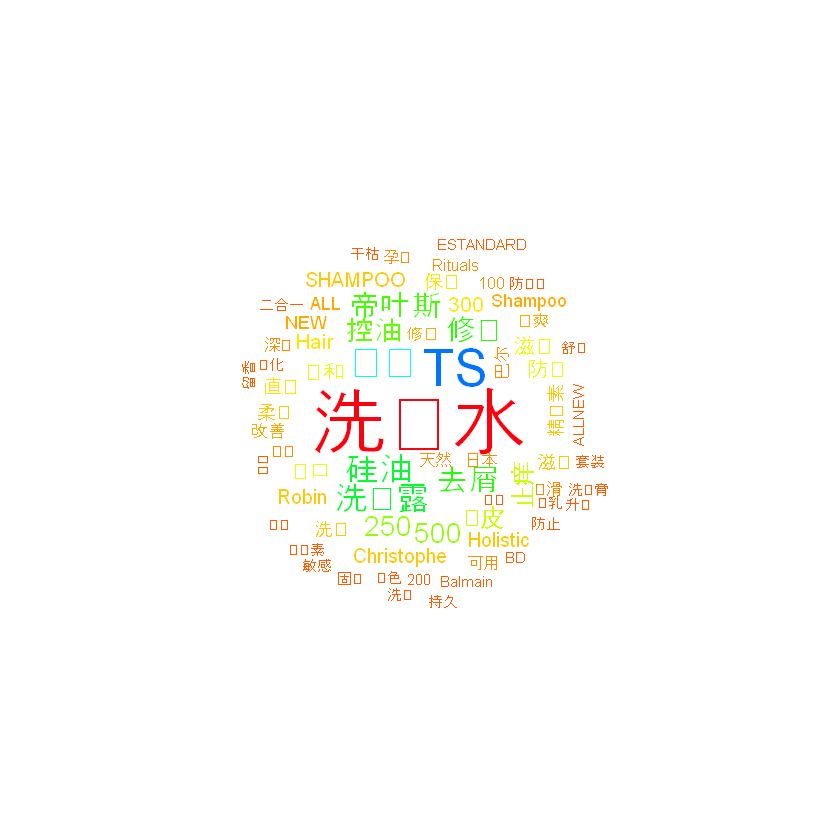

In [7]:

wordcloud(names(seg), seg, colors = rainbow(100), random.order=F)
wordcloud2(seg, color = "random-light", backgroundColor = "grey")